In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

### 复杂函数定义与数据集采样

在本次测试中，采用$f(x) = sin(2\pi x) + \tanh(3x) + \frac{\exp(-x^2)}{2} + 0.2 * \cos(4 \pi x)$函数作为待拟合函数

数据集测则使用等采样的方式生成


In [2]:
def complex_function(x):
    return torch.sin(2 * np.pi * x) + torch.tanh(3 * x) + 0.5 * torch.exp(-x**2) + 0.2 * torch.cos(4 * np.pi * x)

def generate_data(num_samples):
    x = torch.linspace(-2, 2, num_samples).view(-1, 1)
    y = complex_function(x)
    return x, y

此处训练样本采样 1000 个点，测试样本采样 200 个点如下：


In [3]:
train_x, train_y = generate_data(1000)
test_x, test_y = generate_data(200)

### 模型搭建与训练

在本次实验中模型使用简单的两层 MLP，隐藏状态维度为 100，激活函数使用`ReLu`

优化部分损失函数使用`MSELoss`，优化器使用`Adam`，学习率为`0.001`，并且训练 5000 个 epoch


In [4]:
class ReLUNetwork(nn.Module):
    def __init__(self):
        super(ReLUNetwork, self).__init__()
        self.fc1 = nn.Linear(1, 100)
        self.fc2 = nn.Linear(100, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ReLUNetwork()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
num_epochs = 5000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(train_x)
    loss = criterion(outputs, train_y)
    
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/5000], Loss: 0.6003
Epoch [200/5000], Loss: 0.4683
Epoch [300/5000], Loss: 0.4012
Epoch [400/5000], Loss: 0.3680
Epoch [500/5000], Loss: 0.3455
Epoch [600/5000], Loss: 0.3262
Epoch [700/5000], Loss: 0.3081
Epoch [800/5000], Loss: 0.2905
Epoch [900/5000], Loss: 0.2735
Epoch [1000/5000], Loss: 0.2576
Epoch [1100/5000], Loss: 0.2426
Epoch [1200/5000], Loss: 0.2286
Epoch [1300/5000], Loss: 0.2152
Epoch [1400/5000], Loss: 0.2021
Epoch [1500/5000], Loss: 0.1891
Epoch [1600/5000], Loss: 0.1761
Epoch [1700/5000], Loss: 0.1629
Epoch [1800/5000], Loss: 0.1496
Epoch [1900/5000], Loss: 0.1363
Epoch [2000/5000], Loss: 0.1231
Epoch [2100/5000], Loss: 0.1103
Epoch [2200/5000], Loss: 0.0982
Epoch [2300/5000], Loss: 0.0870
Epoch [2400/5000], Loss: 0.0770
Epoch [2500/5000], Loss: 0.0683
Epoch [2600/5000], Loss: 0.0608
Epoch [2700/5000], Loss: 0.0545
Epoch [2800/5000], Loss: 0.0493
Epoch [2900/5000], Loss: 0.0449
Epoch [3000/5000], Loss: 0.0410
Epoch [3100/5000], Loss: 0.0377
Epoch [3200/5000]

### 模型测试及可视化

在训练集上测试的`MSE`结果为`0.0129`，并且可视化训练集样本、测试集样本、预测点结果如下：


In [6]:
model.eval()
with torch.no_grad():
    test_outputs = model(test_x)
    test_loss = criterion(test_outputs, test_y)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0129


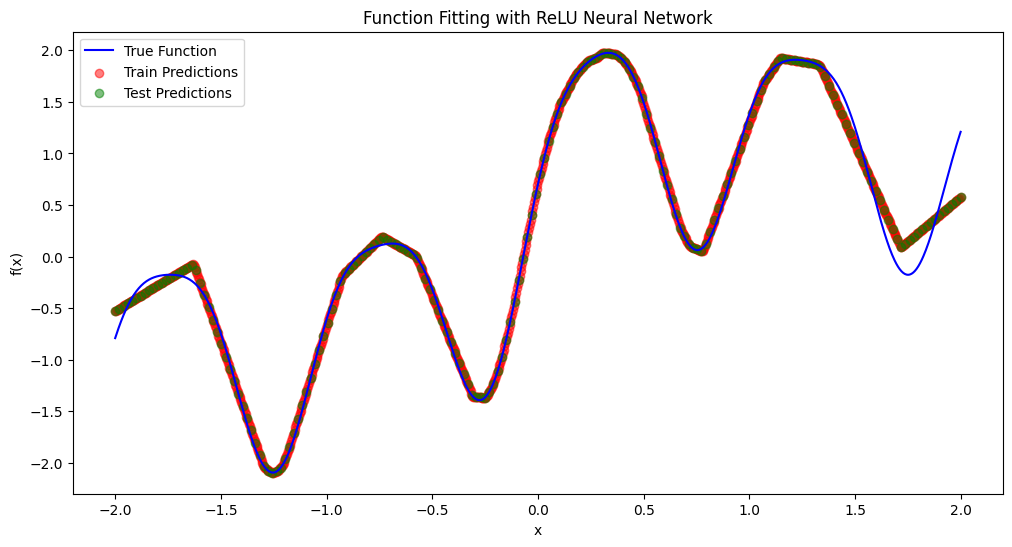

In [7]:
plt.figure(figsize=(12, 6))

plt.plot(train_x.numpy(), train_y.numpy(), label='True Function', color='blue')

plt.scatter(train_x.detach().numpy(), outputs.detach().numpy(), label='Train Predictions', color='red', alpha=0.5)

plt.scatter(test_x.numpy(), test_outputs.numpy(), label='Test Predictions', color='green', alpha=0.5)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function Fitting with ReLU Neural Network')
plt.legend()
plt.show()